In [3]:
import unittest
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import sklearn 
from sklearn import linear_model
import statsmodels.api as sm
import requests 
import json
from operator import itemgetter
from multiprocessing import Pool
from slugify import slugify


# IMPORT DATA 

## Honoraires medecins par spécialité

In [4]:
nan_values=["nc"]
cols=["EFFECTIFS","DEPASSEMENTS (Euros)","HONORAIRES SANS DEPASSEMENT (Euros)"]
df=pd.read_excel("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls",'Spécialistes', decimal=',',na_values=nan_values)
df=df[~df["DEPARTEMENT"].str.contains("TOTAL")]
df=df.dropna()
a=df['DEPARTEMENT']
#df['DEPARTEMENT']=re.sub("\d+", "", a)

def split_it(name):
    return re.sub('(\d+-)','', name)

df['DEPARTEMENT'] = df['DEPARTEMENT'].apply(split_it)

df

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,Ain,17,4.530079e+06,2.496180e+06,0.00,7.026260e+06
1,02- Anesthésie-réanimation chirurgicale,Aisne,19,4.985260e+06,3.738376e+05,0.00,5.359097e+06
2,02- Anesthésie-réanimation chirurgicale,Allier,19,5.102902e+06,5.609786e+05,0.00,5.663880e+06
5,02- Anesthésie-réanimation chirurgicale,Alpes-Maritimes,110,2.485377e+07,1.081635e+07,0.00,3.567012e+07
6,02- Anesthésie-réanimation chirurgicale,Ardèche,23,5.271245e+06,8.025420e+05,0.00,6.073787e+06
8,02- Anesthésie-réanimation chirurgicale,Ariège,0,0.000000e+00,0.000000e+00,0.00,0.000000e+00
9,02- Anesthésie-réanimation chirurgicale,Aube,12,3.693625e+06,9.543920e+03,0.00,3.703169e+06
10,02- Anesthésie-réanimation chirurgicale,Aude,17,4.496992e+06,3.138400e+05,0.00,4.810832e+06
12,02- Anesthésie-réanimation chirurgicale,Bouches-du-Rhône,209,4.848439e+07,3.000051e+06,0.00,5.148444e+07
13,02- Anesthésie-réanimation chirurgicale,Calvados,42,1.386567e+07,3.046143e+05,0.00,1.417029e+07


In [5]:
b=df.groupby("Spécialistes")["DEPASSEMENTS (Euros)"].mean()
#a=df.groupby("Généralistes et compétences MEP")["Taux_depassement"].sum()
b

Spécialistes
02- Anesthésie-réanimation chirurgicale                  3.614749e+06
03- Pathologie cardio-vasculaire                         6.183389e+05
04- Chirurgie générale                                   2.509012e+06
05- Dermato-vénéréologie                                 1.425081e+06
06- Radiodiagnostic et imagerie médicale                 2.138917e+06
07- Gynécologie obstétrique                              3.404486e+06
08- Gastro-entérologie et hépatologie                    1.071206e+06
09- Médecine interne                                     1.510130e+05
10- Neurochirurgie                                       2.624687e+05
11- Oto-rhino-laryngologie                               1.670782e+06
12- Pédiatrie                                            1.102098e+06
13- Pneumologie                                          2.265496e+05
14- Rhumatologie                                         9.638073e+05
15- Ophtalmologie                                        5.022321e+06
16- Chi

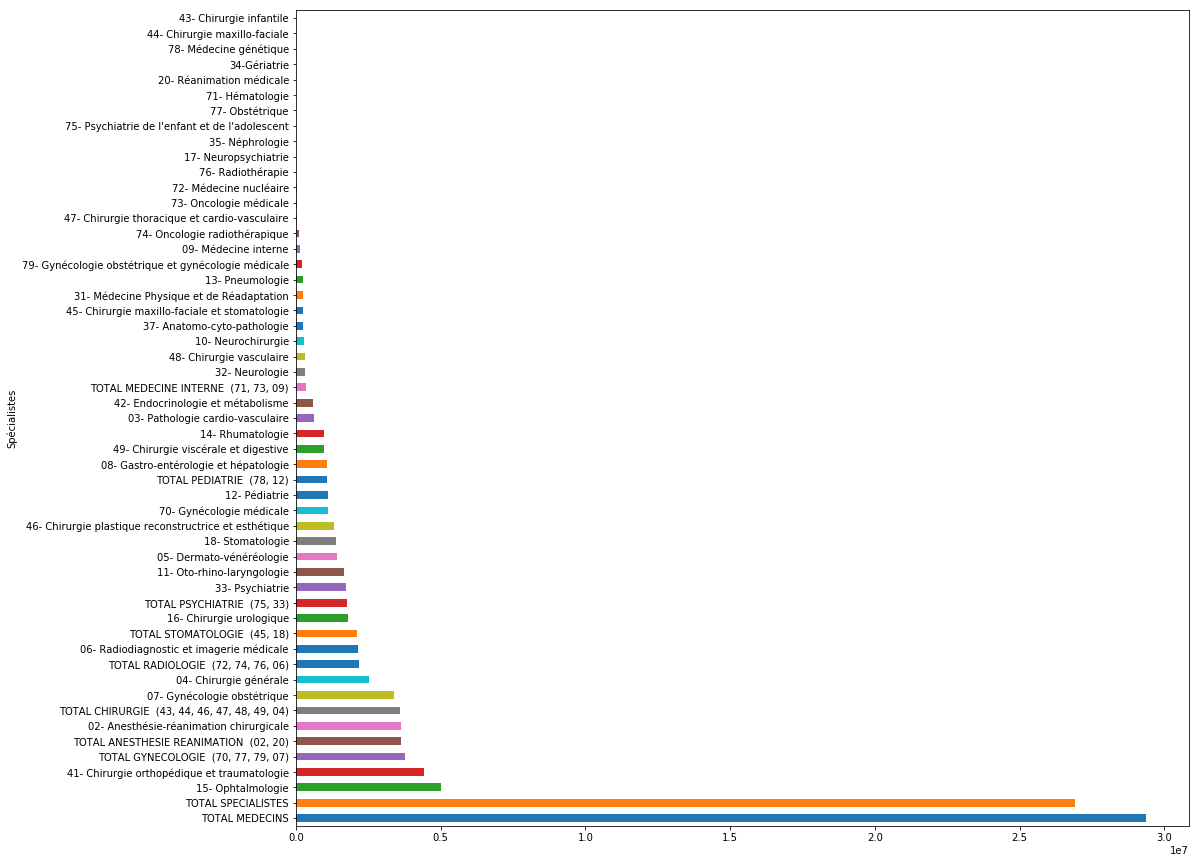

In [6]:
plt.figure(figsize=(16,15))
b.sort_values(ascending=False).plot(kind='barh')


## Honoraires medecins par département

Text(0,0.5,'Depassement')

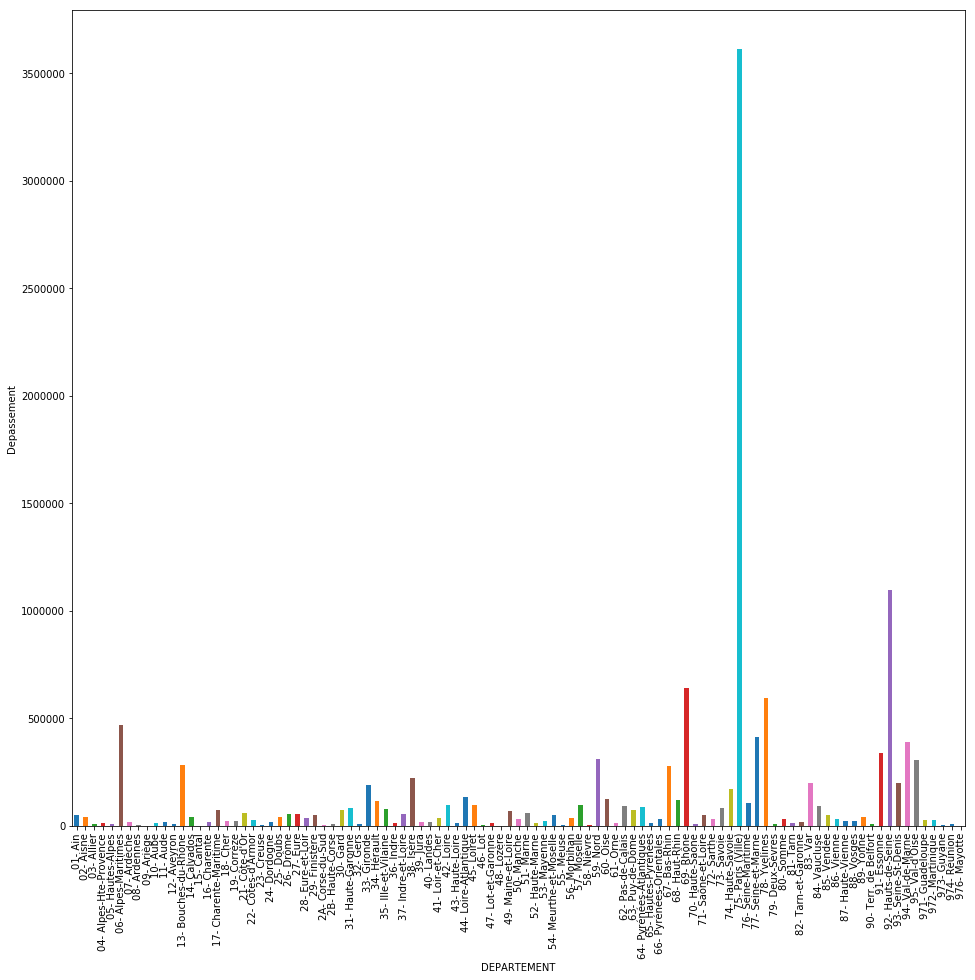

In [7]:
nanvalue=["nc"]
cols=['DEPASSEMENTS (Euros)','HONORAIRES SANS DEPASSEMENT (Euros)','EFFECTIFS']


df=pd.read_excel("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls",'Généralistes et MEP', decimal=',',na_values="nc")
dfgroupbyDepartment_effectif=df.groupby('DEPARTEMENT')['EFFECTIFS'].sum()
df=df[~df["DEPARTEMENT"].str.contains("TOTAL")]
df["HONORAIRES SANS DEPASSEMENT (Euros)"].apply(pd.to_numeric, errors='coerce',downcast="integer")
df["DEPASSEMENTS (Euros)"].apply(pd.to_numeric, errors='coerce',downcast="integer")
#dfgroupbyDepartment_honoraires2=dfgroupbyDepartment_honoraires.groupby('DEPASSEMENTS (Euros)')['HONORAIRES SANS DEPASSEMENT (Euros)'].sum()

dfgroupbyDepartment_honoraires2=df.groupby('DEPARTEMENT')['DEPASSEMENTS (Euros)'].mean()
df.dropna()
c=pd.to_numeric(df["DEPASSEMENTS (Euros)"])/(pd.to_numeric(df["HONORAIRES SANS DEPASSEMENT (Euros)"]))

plt.figure(figsize=(16,15))
dfgroupbyDepartment_honoraires2.plot(kind="bar")
plt.ylabel("Depassement")

## Densité de population par département

In [8]:
col1=["CODE","DEPARTEMENT","Ensemble 0-19ans","Ensemble 20-39ans","Ensemble 40-59ans","Ensemble 60-74ans","Ensemble 75+","TOTAL","Homme_0-19ans","Homme_20-39ans","Homme_40-59ans","Homme_60-74ans","Homme_75+","TOTAL_HOMME","Femme_0-19ans","Femme_20-39ans","Femme_40-59ans","Femme_60-74ans","Femme_75+","TOTAL_FEMME"]
df3=pd.read_excel("estim-pop-dep-sexe-gca-1975-2018.xls","2018",sep=' ',na_values='NaN',cols=col1)
df3.columns=col1
df3=df3.dropna()
df3=df3.drop(columns='CODE')
df3


,DEPARTEMENT,Ensemble 0-19ans,Ensemble 20-39ans,Ensemble 40-59ans,Ensemble 60-74ans,Ensemble 75+,TOTAL,Homme_0-19ans,Homme_20-39ans,Homme_40-59ans,Homme_60-74ans,Homme_75+,TOTAL_HOMME,Femme_0-19ans,Femme_20-39ans,Femme_40-59ans,Femme_60-74ans,Femme_75+,TOTAL_FEMME
4,Ain,168332,150036,178815,100273,52198,649654,86472,75127,89131,48439,21137,320306,81860,74909,89684,51834,31061,329348
5,Aisne,134580,116004,141125,94539,48038,534286,68806,57892,70051,45213,17872,259834,65774,58112,71074,49326,30166,274452
6,Allier,70365,64250,89352,70910,44101,338978,36026,32453,43865,33297,16982,162623,34339,31797,45487,37613,27119,176355
7,Alpes-de-Haute-Provence,34245,29897,43316,33930,20276,161664,17863,15007,21083,16594,8348,78895,16382,14890,22233,17336,11928,82769
8,Hautes-Alpes,31059,28863,38786,27200,15668,141576,15938,14534,19301,13205,6336,69314,15121,14329,19485,13995,9332,72262
9,Alpes-Maritimes,229665,240654,283747,195046,131502,1080614,117879,117832,136788,89184,50531,512214,111786,122822,146959,105862,80971,568400
10,Ardèche,72938,62786,89606,65991,37236,328557,37132,31269,44713,32101,15117,160332,35806,31517,44893,33890,22119,168225
11,Ardennes,63644,57546,73746,49832,26571,271339,32762,28803,36619,24004,10050,132238,30882,28743,37127,25828,16521,139101
12,Ariège,31628,28659,41209,31723,19102,152321,16345,14503,20342,15704,7641,74535,15283,14156,20867,16019,11461,77786
13,Aube,75097,70414,79627,55090,31395,311623,38802,35308,39137,26129,11812,151188,36295,35106,40490,28961,19583,160435


In [9]:
#df3["DEPARTEMENT"]=re.findall(r"\w+", df3["DEPARTEMENT"])
#df3["DEPARTEMENT"]=str(df3[' '])+df3['DEPARTEMENT']

#df4_merge=pd.merge(df[df["Généralistes et compétences MEP"]="01-Médecine générale"],df3,on='DEPARTEMENT',how="outer")
#df=df[df["Généralistes et compétences MEP"]=="01-Médecine générale"]
df=pd.read_excel("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls",'Généralistes et MEP', decimal=',',na_values="nc")
#df=df.groupby("DEPARTEMENT").sum()
df
#df4_merge=pd.merge(df,df3,on='DEPARTEMENT',how="outer")
#df4_merge

def split_it(name):
    return re.sub('(\d+-)','', name)

df['DEPARTEMENT'] = df['DEPARTEMENT'].apply(split_it)
df=df.groupby("DEPARTEMENT").sum().reset_index()
df


cols=["Ensemble 0-19ans","Ensemble 20-39ans","Ensemble 40-59ans","Ensemble 60-74ans","Ensemble 75+","TOTAL","Homme_0-19ans","Homme_20-39ans","Homme_40-59ans","Homme_60-74ans","Homme_75+","TOTAL_HOMME","Femme_0-19ans","Femme_20-39ans","Femme_40-59ans","Femme_60-74ans","Femme_75+","TOTAL_FEMME"]

In [10]:
df=pd.read_excel("Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls",'Généralistes et MEP', decimal=',',na_values="nc")

In [11]:
df3

,DEPARTEMENT,Ensemble 0-19ans,Ensemble 20-39ans,Ensemble 40-59ans,Ensemble 60-74ans,Ensemble 75+,TOTAL,Homme_0-19ans,Homme_20-39ans,Homme_40-59ans,Homme_60-74ans,Homme_75+,TOTAL_HOMME,Femme_0-19ans,Femme_20-39ans,Femme_40-59ans,Femme_60-74ans,Femme_75+,TOTAL_FEMME
4,Ain,168332,150036,178815,100273,52198,649654,86472,75127,89131,48439,21137,320306,81860,74909,89684,51834,31061,329348
5,Aisne,134580,116004,141125,94539,48038,534286,68806,57892,70051,45213,17872,259834,65774,58112,71074,49326,30166,274452
6,Allier,70365,64250,89352,70910,44101,338978,36026,32453,43865,33297,16982,162623,34339,31797,45487,37613,27119,176355
7,Alpes-de-Haute-Provence,34245,29897,43316,33930,20276,161664,17863,15007,21083,16594,8348,78895,16382,14890,22233,17336,11928,82769
8,Hautes-Alpes,31059,28863,38786,27200,15668,141576,15938,14534,19301,13205,6336,69314,15121,14329,19485,13995,9332,72262
9,Alpes-Maritimes,229665,240654,283747,195046,131502,1080614,117879,117832,136788,89184,50531,512214,111786,122822,146959,105862,80971,568400
10,Ardèche,72938,62786,89606,65991,37236,328557,37132,31269,44713,32101,15117,160332,35806,31517,44893,33890,22119,168225
11,Ardennes,63644,57546,73746,49832,26571,271339,32762,28803,36619,24004,10050,132238,30882,28743,37127,25828,16521,139101
12,Ariège,31628,28659,41209,31723,19102,152321,16345,14503,20342,15704,7641,74535,15283,14156,20867,16019,11461,77786
13,Aube,75097,70414,79627,55090,31395,311623,38802,35308,39137,26129,11812,151188,36295,35106,40490,28961,19583,160435


In [15]:
#df4_merge=pd.merge(df,df3,on="DEPARTEMENT",right_index=True,left_index=True)
df4_merge=pd.merge(df,df3,on="DEPARTEMENT",how='inner')#,right_index=True,left_index=True)
df4_merge

,Généralistes et compétences MEP,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),Ensemble 0-19ans,Ensemble 20-39ans,Ensemble 40-59ans,...,Homme_40-59ans,Homme_60-74ans,Homme_75+,TOTAL_HOMME,Femme_0-19ans,Femme_20-39ans,Femme_40-59ans,Femme_60-74ans,Femme_75+,TOTAL_FEMME


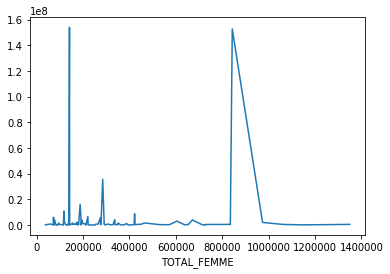

In [13]:
a=df4_merge.groupby("TOTAL_FEMME").mean()["DEPASSEMENTS (Euros)"]
a.plot()

In [14]:
df


,Généralistes et compétences MEP,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,01- Médecine générale,01- Ain,386,5.750133e+07,607026.80,239292.36,5.834765e+07
1,01- Médecine générale,02- Aisne,351,6.650060e+07,304206.04,379373.44,6.718418e+07
2,01- Médecine générale,03- Allier,243,3.662773e+07,59008.16,355037.95,3.704178e+07
3,01- Médecine générale,04- Alpes-Hte-Provence,159,2.316221e+07,96266.01,356512.32,2.361499e+07
4,01- Médecine générale,05- Hautes-Alpes,157,2.002928e+07,237177.08,161293.51,2.042775e+07
5,01- Médecine générale,06- Alpes-Maritimes,1144,1.515849e+08,5694341.33,1113990.51,1.583932e+08
6,01- Médecine générale,07- Ardèche,248,3.652690e+07,212822.36,228460.27,3.696819e+07
7,01- Médecine générale,08- Ardennes,229,4.009021e+07,19809.79,208498.44,4.031852e+07
8,01- Médecine générale,09- Ariège,142,2.143660e+07,7743.11,345217.54,2.178956e+07
9,01- Médecine générale,10- Aube,206,3.652717e+07,129783.00,167944.79,3.682489e+07
